# **Model to diagnose Breast Cancer**

# **Load Data**

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/static/public/17/data.csv')
df

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


# **Data Prepartion**

## **Filtering data**

In [2]:
# Dropping unnecessary column from data set
df = df.drop('ID', axis=1)

## **Data sepration X and y**

In [3]:
from sklearn.preprocessing import LabelEncoder

# As our targeted column is non-numeric we have to transform it into numberic form
label_encoder = LabelEncoder()
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])

y = df['Diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int32

In [4]:
X = df.drop('Diagnosis', axis=1)
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## **Data spliting**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [6]:
X_train

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.23,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.023430,0.1566,0.05708,...,13.89,35.74,88.84,595.7,0.12270,0.16200,0.243900,0.06493,0.2372,0.07242
351,15.750,19.22,107.10,758.6,0.12430,0.23640,0.291400,0.124200,0.2375,0.07603,...,17.36,24.17,119.40,915.3,0.15500,0.50460,0.687200,0.21350,0.4245,0.10500
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.026000,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.104600,0.06968,0.1712,0.07343
497,12.470,17.31,80.45,480.1,0.08928,0.07630,0.036090,0.023690,0.1526,0.06046,...,14.06,24.34,92.82,607.3,0.12760,0.25060,0.202800,0.10530,0.3035,0.07661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,13.460,18.75,87.44,551.1,0.10750,0.11380,0.042010,0.031520,0.1723,0.06317,...,15.35,25.16,101.90,719.8,0.16240,0.31240,0.265400,0.14270,0.3518,0.08665
53,18.220,18.70,120.30,1033.0,0.11480,0.14850,0.177200,0.106000,0.2092,0.06310,...,20.60,24.13,135.10,1321.0,0.12800,0.22970,0.262300,0.13250,0.3021,0.07987
350,11.660,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.011620,0.1671,0.05731,...,13.28,19.74,83.61,542.5,0.09958,0.06476,0.030460,0.04262,0.2731,0.06825
79,12.860,18.00,83.19,506.3,0.09934,0.09546,0.038890,0.023150,0.1718,0.05997,...,14.24,24.82,91.88,622.1,0.12890,0.21410,0.173100,0.07926,0.2779,0.07918


In [7]:
X_test

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.07115,...,20.80,27.78,149.60,1304.0,0.18730,0.59170,0.90340,0.19640,0.3245,0.11980
225,14.340,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.04603,0.2075,0.05448,...,16.77,16.90,110.40,873.2,0.12970,0.15250,0.16320,0.10870,0.3062,0.06072
321,20.160,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,0.1928,0.05096,...,23.06,23.03,150.20,1657.0,0.10540,0.15370,0.26060,0.14250,0.3055,0.05933
173,11.080,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.02583,0.1566,0.06669,...,11.35,16.82,72.01,396.5,0.12160,0.08240,0.03938,0.04306,0.1902,0.07313
506,12.220,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,0.06894,...,13.16,24.17,85.13,515.3,0.14020,0.23150,0.35350,0.08088,0.2709,0.08839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,12.02,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
261,17.350,23.06,111.00,933.1,0.08662,0.06290,0.02891,0.02837,0.1564,0.05307,...,19.85,31.47,128.20,1218.0,0.12400,0.14860,0.12110,0.08235,0.2452,0.06515
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368


# **Model building**

## **Logistic Regression**

### **Training the model**

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### **Applying the model to make a prediction**

In [9]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

### **Evaluate model performance**

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, classification_report

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [11]:
lr_results = pd.DataFrame(['Logistic regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Logistic regression,0.041758,0.818367,0.061404,0.749451


In [12]:
print('Classification Report:')
print(classification_report(y_test, y_lr_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        65
           1       0.94      0.92      0.93        49

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



### **Data visualization of actual vs predicted value**

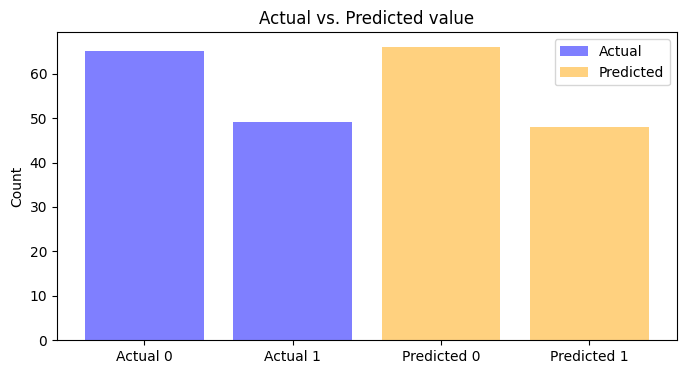

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(['Actual 0', 'Actual 1'], y_test.value_counts().sort_index(), color='blue', alpha=0.5, label='Actual')
plt.bar(['Predicted 0', 'Predicted 1'], pd.Series(y_lr_test_pred).value_counts().sort_index(), color='orange', alpha=0.5, label='Predicted')
plt.title('Actual vs. Predicted value')
plt.ylabel('Count')
plt.legend()
plt.show()